# Install and using qgrid

[qgrid](https://github.com/quantopian/qgrid) is an interactive grid for sorting, filtering, and editing DataFrames in Jupyter notebooks. Sounds fun, right?

## Installing qgrid

Installing qgrid is half pretty easy, half pretty awful. You can just use `pip` to install it.

```bash
pip install qgrid
jupyter nbextension enable --py --sys-prefix qgrid
jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

The problem comes up with the second step, **when enabling it as a jupyter extension.**

## Installation problems and solutions

### Fix TypeError: register() missing 1 required positional argument: 'widget'

If you're using a fresh install of Jupyter, you'll probably encounter an issue like this.

```
Traceback (most recent call last):
  File "/Users/soma/.pyenv/versions/3.10.3/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/Users/soma/.pyenv/versions/3.10.3/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/Users/soma/.pyenv/versions/3.10.3/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
    .....
    from .grid import (
  File "/Users/soma/.pyenv/versions/3.10.3/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qgrid/grid.py", line 524, in <module>
    @widgets.register()
TypeError: register() missing 1 required positional argument: 'widget'
```

To fix this, you need to install a different version of `ipywidgets`. For some reason the new ipywidgets 8 doesn't work, but the older ipywidgets 7 does. This command will install the newest version of ipywidgets 7:

```bash
pip install 'ipywidgets~=7.0'
```

Then we can enable the extension with these two commands:

```bash
jupyter nbextension enable --py --sys-prefix qgrid
jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

And you should get two very nice "Validating: OK" messages:

```
Enabling notebook extension qgrid/extension...
      - Validating: OK
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
```

### Fix for "Failed to load model class 'QgridModel' from module 'qgrid'"

If you just updated ipywidgets, you're very excited to use **qgrid**: *but it won't work.* You'll get this error if you try to use it:

```
Failed to load model class 'QgridModel' from module 'qgrid'
Error: Script error for "qgrid"
```

To fix this error, **just restart your Jupyter server.** Ctrl+C to close it down, then run `jupyter notebook` again to start it back up.

## How to display and sort with qgrid

Using qgrid to display and sort your data makes life easy. All you need to do is run `qgrid.show_grid` and feed it your dataframe.

In this case we're using `precision=2` to round life expectancy to two decimal places.

In [1]:
import pandas as pd
import qgrid

df = pd.read_csv("countries.csv")
qgrid.show_grid(df, precision=2)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

You can't see the interactive version on the web, so here's a screenshot.

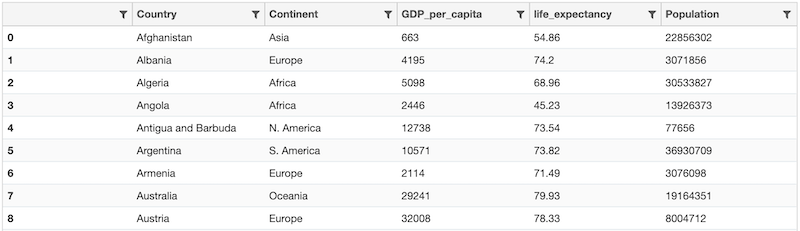

## How to edit with qgrid

qgrid is also a great took for making manual edits! The edits are saved and can be used later.

First, we'll **start with a pandas dataframe.** This one is a few science fiction authors.

In [2]:
import pandas as pd

df = pd.DataFrame([
    { 'name': 'Philip K. Dick', 'book': 'Do Androids Dream of Electric Sheep?' },
    { 'name': 'Ursula K. Le Guin', 'book': 'The Left Hand of Darkness' },
    { 'name': 'Stanisław Lem', 'book': 'Solaris' }
])

df.head()

name                                  book
0     Philip K. Dick  Do Androids Dream of Electric Sheep?
1  Ursula K. Le Guin             The Left Hand of Darkness
2      Stanisław Lem                               Solaris

While Stanisław Lem is great, not everyone knows how to type an ł – we'll use qgrid to change his first name from **Stanisław** to **Stanislaw**.

Unlike when we're just sorting and filtering, this time we're saving our grid as a variable named `qgrid_widget`.

In [3]:
import qgrid

qgrid_widget = qgrid.show_grid(df)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

(Pretend that you're watching me edit this the ł to an l in Stanisław's name)
 
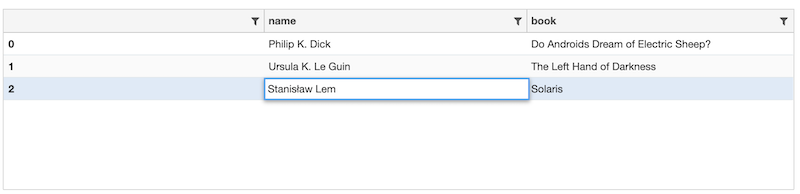

**Edits made in qgrid do not edit your original dataframe.** In order to get the edited dataframe, you ask the widget from the changed df with `get_changed_df()`.

In [23]:
edited_df = qgrid_widget.get_changed_df()
edited_df

name                                  book
0     Philip K. Dick  Do Androids Dream of Electric Sheep?
1  Ursula K. Le Guin             The Left Hand of Darkness
2      Stanislaw Lem                               Solaris

## Comparing df before and after edits

It's probably important to know **what was edited**. While unfortunately qgrid doesn't give us a nice JSON diff or anything, we have a couple simple options to see what edits were made.

### Compare each row with `df.merge`

In this situation, we use `indicator=True` to mark whether the row is found in the original or edited version of the data. You're probably interested in `left_only` and `right_only`.

In [45]:
df.merge(edited_df, indicator=True, how='outer')

name                                  book      _merge
0     Philip K. Dick  Do Androids Dream of Electric Sheep?        both
1  Ursula K. Le Guin             The Left Hand of Darkness        both
2      Stanisław Lem                               Solaris   left_only
3      Stanislaw Lem                               Solaris  right_only

### Only show the changes

You can also use [df.compare](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html) to just illustrate the changes between the two.

In [46]:
edits = df.compare(edited_df)
edits

name               
            self          other
2  Stanisław Lem  Stanislaw Lem